## Assignment 2 was completed alone

# Assignment 2: Evaluation and selection of decision models


In [ ]:
# importing librarie
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

The train_test_split function of scikit-learn allows us to randomly split the dataset into two partitions train (learning) and test (evaluation) according to arbitrary proportions.

As usual, it is interesting to visualize the data available to us. We can construct the scatter plots in two dimensions using Matplotlib:

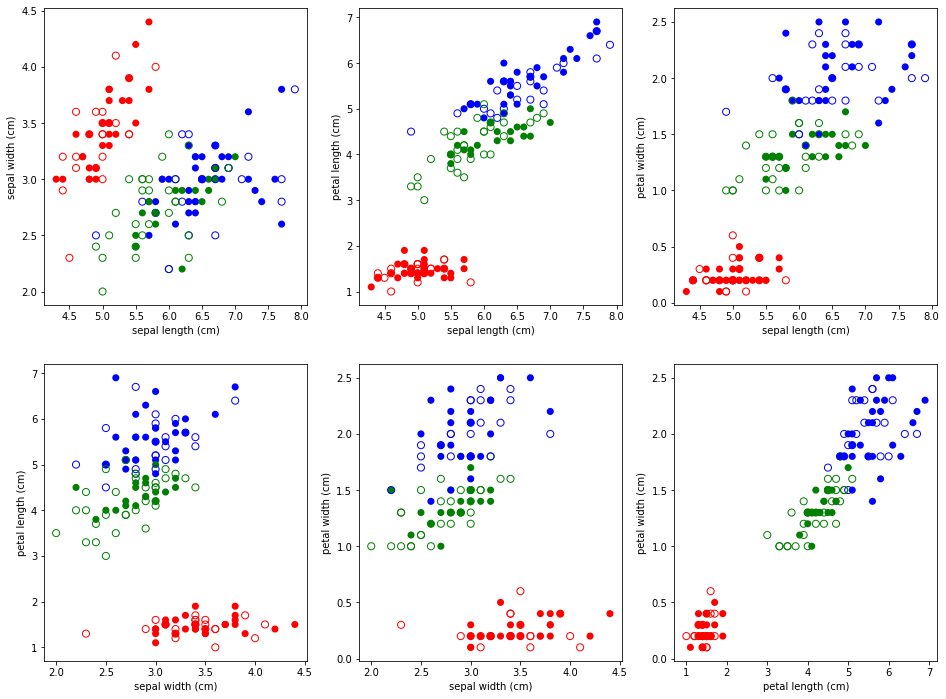

In [ ]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[-1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
        plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train], s=50, edgecolors='none')
        plt.scatter(X_test[:,  dim1], X_test[:, dim2], c='none',  s=50, edgecolors=cmp[y_test])
        plt.xlabel(iris.feature_names[dim1])
        plt.ylabel(iris.feature_names[dim2])
        idx += 1
plt.show()

## Question 1

Why do we have six different point clouds? What does each figure represent?

In [ ]:
# Using MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

To estimate generalization error, we will use K-fold cross-validation. This will allow us to adjust, if necessary, the hyperparameters of the decision model. scikit-learn implements various cross-validation strategies in the sklearn.model_selection module. Let start by experimenting with the K-fold approach. The KFold object has a .split() method that generates lists of observation indices to be used for the training subset and for the validation subset. More details on this object can be found in the [K-Fold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

# Code for question 2

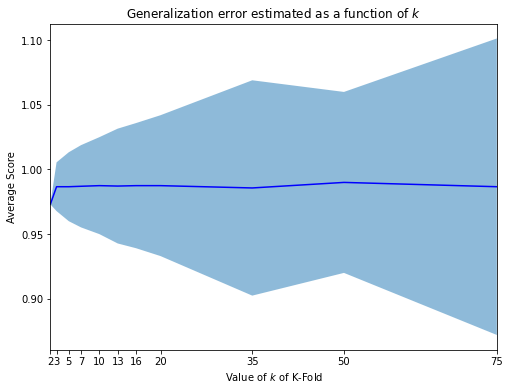

In [ ]:
# KFold for different values of k
from sklearn.model_selection import KFold

# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20, 35, 50, 75])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show()

# Code for question 3

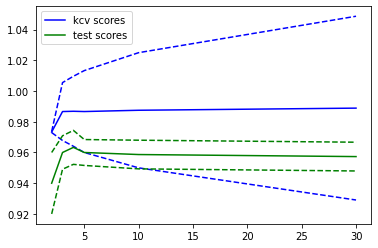

[0.97332859 0.98666667 0.98684211 0.98666667 0.9875     0.98888889]
[0.00035562 0.01885618 0.02279014 0.02666667 0.0375     0.05983516]


In [ ]:
#code block for k fold

kcvScores = list()
kcvScoresStd = list()
testScores = list()
testScoresStd = list()

kcvfs = [2, 3, 4, 5, 10, 30]

#for each value in K
for kcvf in kcvfs:
  kf = KFold(n_splits=kcvf)
  tempScores = list()
  tempTestScores = list()
  
  # setup model to evaluate each split
  for trainX, testX in kf.split(X_train):
    clf.fit(X_train[trainX], y_train[trainX])
    tempScores.append(clf.score(X_train[testX], y_train[testX]))
    tempTestScores.append(clf.score(X_test, y_test))
  
  # calculation of the avg/std scores on each fold
  kcvScores.append(np.mean(tempScores))
  kcvScoresStd.append(np.std(tempScores))
  testScores.append(np.mean(tempTestScores))
  testScoresStd.append(np.std(tempTestScores))

# setup np.array from calculated lists
kcvScores, kcvScoresStd = np.array(kcvScores), np.array(kcvScoresStd)
testScores, testScoresStd = np.array(testScores), np.array(testScoresStd)

# plot of avg performance and plus/minus 1 std for each k value
plt.figure()
plt.plot(kcvfs, kcvScores, 'b', label = 'kcv scores')
plt.plot(kcvfs, kcvScores+kcvScoresStd, 'b--')
plt.plot(kcvfs, kcvScores-kcvScoresStd, 'b--')
plt.plot(kcvfs, testScores, 'g', label = 'test scores')
plt.plot(kcvfs, testScores+testScoresStd, 'g--')
plt.plot(kcvfs, testScores-testScoresStd, 'g--')
plt.legend()
plt.show()

print(kcvScores)
print(kcvScoresStd)


# code for question 4

In [ ]:
# Leave One Out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X_train)
myScores = list()
for trainSet, testSet in loo.split(X_train):
  clf.fit(X_train[trainSet], y_train[trainSet])
  myScores.append(clf.score(X_train[testSet], y_train[testSet]))

print(np.mean(myScores))
print(np.std(myScores))

1.0
0.0


# Code blocks for question 5-10

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# to use MLP
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In [ ]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3), tuned_parameters, cv=5)

# grid search execution
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(5,), (20,), (50,), (100,),
                                                (150,), (200,)]})

In [ ]:
print(clf.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (100,)}


In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.01580067, 0.02334118, 0.05032191, 0.09802375, 0.05696173,
       0.10826426, 0.02425971, 0.05399399, 0.04835973, 0.0505053 ,
       0.04441895, 0.0806427 , 0.03789244, 0.04286752, 0.05067153,
       0.06604195, 0.07324581, 0.08279743, 0.03318925, 0.04350142,
       0.04800124, 0.05947142, 0.07054257, 0.09177136]), 'std_fit_time': array([0.00913822, 0.00994272, 0.03063499, 0.08647021, 0.0419992 ,
       0.08828927, 0.00881632, 0.05144109, 0.04977685, 0.05761161,
       0.02665807, 0.06299071, 0.01800508, 0.00764865, 0.00430556,
       0.0127478 , 0.00861577, 0.01623055, 0.00345078, 0.00597731,
       0.00849741, 0.00707826, 0.00480154, 0.03279733]), 'mean_score_time': array([0.00055861, 0.00054526, 0.00054665, 0.00073709, 0.00059295,
       0.00058064, 0.00049915, 0.00063086, 0.0005753 , 0.00064445,
       0.00053921, 0.00080271, 0.00071445, 0.00056925, 0.00054483,
       0.00057001, 0.00055995, 0.0005856 , 0.0005713 , 0.00052967,
       0.00051832, 0.00054016

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


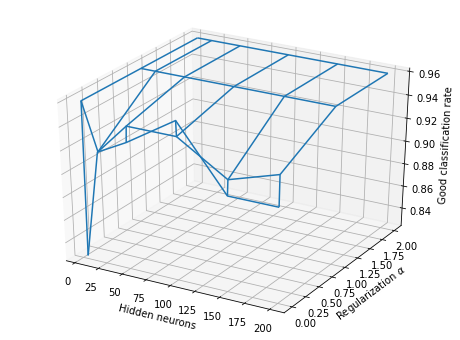

In [ ]:
n_hidden = np.array([s[0] for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])

# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)

# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate")
ax.plot_wireframe(xx, yy, scores)
plt.show()

In [ ]:
clf.score(X_test, y_test)

0.96

In [ ]:
new_parameters = {'hidden_layer_sizes':[(50,)], 'alpha': [1]}

newClf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3), new_parameters, cv=5)

# grid search execution
newClf.fit(X_train, y_train)

print(newClf.score(X_test, y_test))

0.9733333333333334


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

rlf = RandomizedSearchCV(MLPClassifier(solver='lbfgs'), param_distributions=stats, n_iter=50, cv=5)
search = clf.fit(X_test, y_test)
print(search.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (50,)}


# Question 11 code

In [ ]:
#halving grid search example

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

X, y = load_iris(return_X_y=True)
halfClf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": [3, None],"min_samples_split": [5, 10]}
search = HalvingGridSearchCV(halfClf, param_grid, resource='n_estimators',max_resources=10,random_state=0).fit(X, y)
print(search.best_params_ )

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 9}
